In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import re

# Lectura y filtrado base idiomas

In [ ]:
data = '/content/base_idiomas.csv'

In [ ]:
df = pd.read_csv(data)
df

,Unnamed: 0,id_x,host_id,host_acceptance_rate,neighbourhood_cleansed,price,number_of_reviews,property_type,listing_id,id_y,date,reviewer_id,reviewer_name,comments,idioma
0,0,56074,265650,100%,Cuauhtémoc,$585.00,84,Entire condo,56074,1366070854336127521,2025-02-27,30291522,Roxane,Spacious with a great view. Close to metro and...,en
1,1,70644,212109,93%,Coyoacán,"$1,015.00",132,Entire rental unit,70644,1171884604950995637,2024-06-04,215412159,Iris,I've stayed with Trisha a few times now and it...,en
2,2,70644,212109,93%,Coyoacán,"$1,015.00",132,Entire rental unit,70644,1225563762364945841,2024-08-17,9422898,Alina,Loved staying at Trisha’s! She is very kind an...,en
3,3,70644,212109,93%,Coyoacán,"$1,015.00",132,Entire rental unit,70644,1235609340581732012,2024-08-31,842659,Patrick,A beautiful place in the heart of Coyoacán. Gr...,en
4,4,70644,212109,93%,Coyoacán,"$1,015.00",132,Entire rental unit,70644,1251551677656499486,2024-09-22,174051999,Patrice,Toujours un excellent endroit pour un séjour à...,fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427831,427831,1376450215192500292,658651066,95%,Miguel Hidalgo,"$2,800.00",1,Entire rental unit,1376450215192500292,1379147337879867836,2025-03-17,17849340,Adriana,"Nos encantó el departamento, fue fácil accesar...",es
427832,427832,1374706754126917385,501218890,100%,Cuauhtémoc,$951.00,1,Private room in home,1374706754126917385,1378397507556801277,2025-03-16,247710811,Montserrat,"Me la pasé muy bien, los recepcionistas muy am...",es
427833,427833,1376960821808863954,501218890,100%,Cuauhtémoc,"$1,246.00",1,Private room in home,1376960821808863954,1379136148645804614,2025-03-17,549134230,Flor,"Excelente Lugar, la zona super tranquila y seg...",es
427834,427834,1377682946730222411,385958355,100%,Benito Juárez,$376.00,1,Private room in rental unit,1377682946730222411,1380562485283457476,2025-03-19,130080605,Salvador,"Excelente la atención, siempre pendiente y muy...",es


In [ ]:
df = df[df['idioma'] == 'es']
df

,Unnamed: 0,id_x,host_id,host_acceptance_rate,neighbourhood_cleansed,price,number_of_reviews,property_type,listing_id,id_y,date,reviewer_id,reviewer_name,comments,idioma
19,19,165772,790208,95%,Miguel Hidalgo,"$3,982.00",377,Entire home,165772,1105877442882492394,2024-03-05,537777999,Fernanda,Estuvimos muy contentos en la casa de Francisc...,es
23,23,165772,790208,95%,Miguel Hidalgo,"$3,982.00",377,Entire home,165772,1124810129860258054,2024-03-31,457450030,Maria Fernanda,Estancia impecable. <br/>todo como en la descr...,es
26,26,165772,790208,95%,Miguel Hidalgo,"$3,982.00",377,Entire home,165772,1162391697068413493,2024-05-22,407380118,Jesus,Un lugar increíble! La decoración y ambientaci...,es
56,56,171109,816295,75%,Benito Juárez,$327.00,111,Private room in rental unit,171109,1104438634739415563,2024-03-03,165658188,Jesús Ernesto,Ubicación inmejorable para asistir a eventos e...,es
59,59,171109,816295,75%,Benito Juárez,$327.00,111,Private room in rental unit,171109,1213134785831412158,2024-07-31,503163643,Efren,Me quedaría corto de lo increíble que fue mi e...,es
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427830,427830,1374656027521852086,501218890,100%,Cuauhtémoc,$951.00,1,Private room in home,1374656027521852086,1378384073107708110,2025-03-16,114054361,Abraham,Es un buen lugar para hospedarse estancias cor...,es
427831,427831,1376450215192500292,658651066,95%,Miguel Hidalgo,"$2,800.00",1,Entire rental unit,1376450215192500292,1379147337879867836,2025-03-17,17849340,Adriana,"Nos encantó el departamento, fue fácil accesar...",es
427832,427832,1374706754126917385,501218890,100%,Cuauhtémoc,$951.00,1,Private room in home,1374706754126917385,1378397507556801277,2025-03-16,247710811,Montserrat,"Me la pasé muy bien, los recepcionistas muy am...",es
427833,427833,1376960821808863954,501218890,100%,Cuauhtémoc,"$1,246.00",1,Private room in home,1376960821808863954,1379136148645804614,2025-03-17,549134230,Flor,"Excelente Lugar, la zona super tranquila y seg...",es


#Procesamiento del texto:


*   Stopwords
*   Lematizacion
*   Puntuacion


In [ ]:
!pip install emoji >NULL

In [ ]:
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import emoji

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#!pip install stanza
#import stanza
#stanza.download('es')
#nlp = stanza.Pipeline('es')

#prueba1 = df.iloc[0:100]['comments']
#prueba1 = " ".join(prueba1)
#prueba1 = re.sub(r"<\s*br\s*/?>", "", prueba1)
#prueba1 = re.sub(rf"[{re.escape(string.punctuation)}]", " ", prueba1.lower())
#prueba1= re.sub(r'  ', " ", prueba1) #Agregar limpieza de caracteres especiales entre textos y acentos
#nlp_stanza = nlp(prueba1)

#lemas = [word.lemma for sent in nlp_stanza.sentences for word in sent.words]
#lemas

In [ ]:
nlp_es = spacy.load('es_core_news_lg') #idioma español
#checar con stanza y comparar el resultado con spacy

In [ ]:
es_stops = set(stopwords.words('spanish'))

custom_stop_words = ['alguna', 'near', 'cómo',  'casi', 'vaya', ',']  # Replace with your custom stop words
es_stops.update(custom_stop_words)

In [ ]:
def remove_stopwords(text):
    new = []
    for word in text.split():
        if word not in es_stops:
            new.append(word)
    return " ".join(new)

def remove_laughs(text):
    new = []
    for word in text.split():
        if bool(re.fullmatch('a*ja+j[ja]*', word))==False:
            new.append(word)
    return ' '.join(new)

In [ ]:
def clean_text(text): #escribir cual nlp usar

  text = re.sub(r"<\s*br\s*/?>", "", text)
  text = re.sub(rf"[{re.escape(string.punctuation)}]", " ", text.lower()) #Puntuaciones y minusculas
  text = re.sub(r'[áàäâ]', 'a', re.sub(r'[éèëê]', 'e', re.sub(r'[íìïî]', 'i', re.sub(r'[óòöô]', 'o', re.sub(r'[úùüû]', 'u', text))))) #limpieza de acentos
  #text = emoji.replace_emoji(text, replace="") #limpieza de emojis
  text = re.sub(r'  ', " ", text) #Dobles espaciados
  text = nlp_es(text)
  text = [token.lemma_ for token in text if token.text not in es_stops and not token.is_punct]

  return ' '.join(text)

In [ ]:
df['comments'] = df['comments'].apply(clean_text)
prueba = df[0:100]
prueba['comments'] = prueba['comments'].apply(clean_text)
prueba['comments'] = prueba['comments'].apply(remove_stopwords)
prueba['comments'] = prueba['comments'].apply(remove_laughs)
np.array(prueba['comments'])

KeyboardInterrupt: 

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", repeat=True)
text_for_wordcloud = " ".join(prueba['comments'])
wc.generate(text_for_wordcloud)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
from collections import Counter
def process_text(text):
    words = text.split()
    frequencies = Counter(words)
    for word, count in frequencies.most_common():
        print(f"'{word}': {count} times")

In [ ]:
process_text(text_for_wordcloud)

In [ ]:
np.unique(text_for_wordcloud.split(' '))

#Categorizacion Positivos y Negativos

In [ ]:
prueba = df.copy()
prueba['comments'] = prueba['comments'].apply(clean_text)
prueba['comments'] = prueba['comments'].apply(remove_stopwords)
prueba['comments'] = prueba['comments'].apply(remove_laughs)
np.array(prueba['comments'])

array(['contento casa francisco buen gusto lugar super acogedor definitivamente ir volver gracias',
       'estancia impecable descripcion',
       'lugar increible decoracion ambientacion lugar super original respuesta francisco pequeño detalle super rapido salir extremadamente feliz ahi definitivamente buscar hospedar aqui nuevo',
       ..., 'pasar bien recepcionista amable experiencia genial gracia',
       'excelente lugar zona super tranquilo seguro filtrar ruido bastante privacidad personal super amable estancia limpio comodo duda vuelvogracia',
       'excelente atencion siempre pendiente accesible tema horario imprevisto necesitar ingresar excelente'],
      dtype=object)

In [ ]:
def detect_emojis(text):
  emojis = emoji.distinct_emoji_list(text)
  return emojis

In [ ]:
#print(prueba.iloc[0]['comments'])

In [ ]:
prueba['emojis'] = prueba['comments'].apply(detect_emojis)

In [ ]:
print(prueba['emojis'].apply(lambda x: ', '.join(x)).unique())

['' '❤, 🌸' '🙏' ... '🥺, 🤍' '🧿, 🪬, 🙏, 🕉, 🌹' '💗, 🏻, 🙏, ✨']


In [ ]:
import sys
with np.printoptions(threshold=sys.maxsize):
    print(prueba['emojis'].apply(lambda x: ', '.join(x)).unique())

['' '❤, 🌸' '🙏' '🏻, 🙌' '🥹, ❤' '❤' '\U0001fa77' '🙌, 🏼' '🫶' '✨' '🫰🏼' '😊' '🏠'
 '👍, 🏼' '🤗, 🫶🏼, 🙏, 🏼' '🏽, 👍' '😅' '🏽, 🙌' '☺' '😉' '😁' '😂, 🥰' '🤗' '🫂, ✨'
 '🫰🏻, ✨' '🙏, 🏼' '👌' '♥' '🌼, ☔' '👐' '🤓, ✨' '👍' '🏻, 🙏' '🏻, 👍' '🥴' '🥰' '🌟'
 '🫶, 🌟' '🙂' '🏻, 👌' '🤤' '🌳' '👌, 🏼' '🫶🏻, 🏻, 🙏, ✨' '💙' '😁, 🥴' '💤' '😍' '💎' '🏡'
 '💯' '🤍' '⭐' '😄' '😀' '😼' '\U0001f6dc, 👍, 💻' '🧡' '😌, 👌, 🏼' '😃' '😘' '😆' '💖'
 '🫶🏽' '💞' '🙋, 🏿' '🙏, 💕' '💕, \U0001fa75, 🫶🏻' '🫰🏻' '👋' '❤, 🏻, 👌' '😃, 👍'
 '🙋, 🥣' '✅' '😁, 🫰' '😌' '🏻, 🙏, 🙌, ✨' '💯, ⭐' '🥺' '🏽, ☝' '🤓' '🏽, 👌' '🫡'
 '😌, ☺' '💕' '😻, 🫰🏻' '☀, ✨' '🐈, ⬛' '🙌' '🫶🏻' '🤙' '🏻, 🙏, 🙌, 🏼' '🏽, 😅, 🧚, ✨'
 '😍, 🏆, 🪟' '💜' '🏽, 🙏, ♥' '🤩' '😞' '⭐, 🏻, 👌' '😍, 🫶🏽, 🥰' '🏡, ♥' '🙏, 👍, 😃'
 '🌌, 🙂, ✨' '🏽, 🤍, 🙏' '😍, 💕, ✨' '🥶' '⭐, 👌' '😌, 🏽, 👌' '😇, ✨' '🫶🏼' '👌, 🙏'
 '🙂, 👍' '😊, ✨' '💐, 🫶🏻' '🐱' '🏻, 🙌, ♥' '🫶🏻, 🙏, 🏻, 👏, ✨' '🏻, 🙏, ✨' '😇' '✈'
 '☹' '🍀' '🫶🏼, 💕' '🥲' '🏾, 👏' '🌱, 🙌, 🏼' '👏' '🏻, 👍, 😉' '👍, 😀' '😎'
 '👌, 🙋, ♀, 🏾, 🏽' '✨, 😊' '❤, 🛫' '💖, 👌, 🏻' '🍞, 🫶🏻' '❤, 🔥, 💪'
 '\U0001f6dc, 🙄, 👉' '❤, 🥰' '👌, 🏼, 😊' '😍, ❤' '🤢' '🫰🏽' '🏽, 🙏' '🥇'
 '💕, ❤, 🏻, 🙌' '🤝' '🙃' '

In [ ]:
#angry_emojis =['🤡','🙄', '🤮','😵','😞','🥶','☹','🤢','🙃','😩','😢','🥵', '🤬', '👿', '💢','💔','🤔','🤦','🤷','👎','😣','👻','😐','😕','📝','🩹','🦟','🍄','🤨','😓','😱','🧹','😔','🥴','☹','😪','😤','😳','🥱','💩','😭','🥺','😠','👀','❌','⚠','🤕','💀','🙁','😡','😖','😠','😞','😒','😟','😰','🙅','🚩','😟','🚨','🚧','😿','🧻','😾','😣','👁','🤏🏻','🐱','🐜','🤒']

angry_emojis =['🤡','🙄', '🤮','😞','☹','🤢','😢', '🤬', '👿', '💢','💔','🤔','🤦','👎','😣','😐','😕','🤨','😓','😱','😔','😪','😤','🥱','💩','😭','😠','❌','⚠','🤕','💀','🙁','😡','😖','😠','😞','😒','😟','😰','🙅','🚩','😟','🚨','😿','😾','😣','🤏🏻','🤒']

In [ ]:
#prueb = prueba.iloc[0:2000]
prueba['neg'] = prueba['comments'].apply(lambda x: any(sentimiento in x for sentimiento in angry_emojis))
prueba

,Unnamed: 0,id_x,host_id,host_acceptance_rate,neighbourhood_cleansed,price,number_of_reviews,property_type,listing_id,id_y,date,reviewer_id,reviewer_name,comments,idioma,emojis,neg
19,19,165772,790208,95%,Miguel Hidalgo,"$3,982.00",377,Entire home,165772,1105877442882492394,2024-03-05,537777999,Fernanda,contento casa francisco buen gusto lugar super...,es,[],False
23,23,165772,790208,95%,Miguel Hidalgo,"$3,982.00",377,Entire home,165772,1124810129860258054,2024-03-31,457450030,Maria Fernanda,estancia impecable descripcion,es,[],False
26,26,165772,790208,95%,Miguel Hidalgo,"$3,982.00",377,Entire home,165772,1162391697068413493,2024-05-22,407380118,Jesus,lugar increible decoracion ambientacion lugar ...,es,[],False
56,56,171109,816295,75%,Benito Juárez,$327.00,111,Private room in rental unit,171109,1104438634739415563,2024-03-03,165658188,Jesús Ernesto,ubicacion inmejorable asistir evento wtc zona ...,es,[],False
59,59,171109,816295,75%,Benito Juárez,$327.00,111,Private room in rental unit,171109,1213134785831412158,2024-07-31,503163643,Efren,quedariar corto increible estadia carlos comen...,es,[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427830,427830,1374656027521852086,501218890,100%,Cuauhtémoc,$951.00,1,Private room in home,1374656027521852086,1378384073107708110,2025-03-16,114054361,Abraham,buen lugar hospedar estancia corto gran ubicac...,es,[],False
427831,427831,1376450215192500292,658651066,95%,Miguel Hidalgo,"$2,800.00",1,Entire rental unit,1376450215192500292,1379147337879867836,2025-03-17,17849340,Adriana,encantar departamento facil accesar guardia co...,es,[],False
427832,427832,1374706754126917385,501218890,100%,Cuauhtémoc,$951.00,1,Private room in home,1374706754126917385,1378397507556801277,2025-03-16,247710811,Montserrat,pasar bien recepcionista amable experiencia ge...,es,[],False
427833,427833,1376960821808863954,501218890,100%,Cuauhtémoc,"$1,246.00",1,Private room in home,1376960821808863954,1379136148645804614,2025-03-17,549134230,Flor,excelente lugar zona super tranquilo seguro fi...,es,[],False


In [ ]:
prueba_neg = prueba[prueba['neg'] == True]
prueba_neg
prueba_pos = prueba[prueba['neg'] == False]

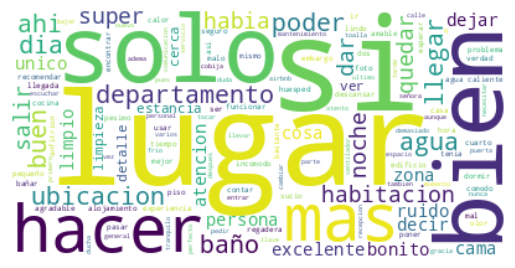

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", repeat=True)
text_for_wordcloud = " ".join(prueba_neg['comments'])
wc.generate(text_for_wordcloud)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
wc.to_image().save('wc_neg.png')

In [ ]:
from collections import Counter
def process_text(text):
    words = text.split()
    frequencies = Counter(words)
    for word, count in frequencies.most_common(1000):
        print(f"'{word}': {count} times")

In [ ]:
process_text(text_for_wordcloud)

'lugar': 99 times
'si': 80 times
'bien': 75 times
'solo': 72 times
'hacer': 65 times
'agua': 59 times
'️': 53 times
'mas': 52 times
'departamento': 52 times
'ubicacion': 51 times
'buen': 51 times
'baño': 51 times
'poder': 50 times
'llegar': 42 times
'dar': 40 times
'dia': 39 times
'habitacion': 37 times
'quedar': 37 times
'ahi': 37 times
'super': 37 times
'unico': 35 times
'habia': 34 times
'zona': 34 times
'salir': 34 times
'noche': 34 times
'excelente': 31 times
'persona': 31 times
'cama': 30 times
'ruido': 30 times
'dejar': 29 times
'limpio': 29 times
'bonito': 29 times
'decir': 28 times
'atencion': 28 times
'cosa': 28 times
'estancia': 27 times
'3': 27 times
'caliente': 26 times
'dormir': 26 times
'limpieza': 25 times
'⭐': 25 times
'detalle': 24 times
'ver': 24 times
'foto': 24 times
'cerca': 24 times
'alojamiento': 24 times
'problema': 23 times
'sucio': 23 times
'👎': 23 times
'cuarto': 23 times
'hora': 23 times
'cocina': 22 times
'comodo': 21 times
'recomendar': 21 times
'✅': 21 t

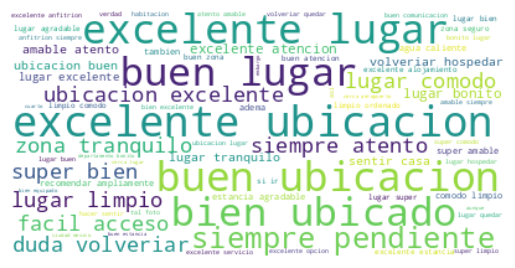

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", repeat=True)
tex_for_wordcloud = " ".join(prueba_pos['comments'])
wc.generate(tex_for_wordcloud)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
process_text(tex_for_wordcloud)

'lugar': 120622 times
'excelente': 95542 times
'buen': 68970 times
'ubicacion': 60355 times
'bien': 57141 times
'comodo': 49442 times
'limpio': 45756 times
'super': 40494 times
'amable': 39114 times
'zona': 37766 times
'departamento': 36804 times
'cerca': 35105 times
'siempre': 34781 times
'estancia': 33496 times
'atento': 30050 times
'tranquilo': 29675 times
'duda': 29357 times
'bonito': 28936 times
'agradable': 27994 times
'si': 26479 times
'alojamiento': 25742 times
'atencion': 23276 times
'seguro': 22428 times
'recomendar': 20238 times
'pendiente': 18704 times
'anfitrion': 18490 times
'quedar': 18406 times
'poder': 17834 times
'hacer': 16967 times
'volveriar': 16070 times
'solo': 16064 times
'ubicado': 15778 times
'mas': 15368 times
'casa': 15231 times
'llegar': 15199 times
'perfecto': 14636 times
'hospedar': 14419 times
'foto': 14193 times
'facil': 14002 times
'recomendable': 13694 times
'espacio': 13458 times
'gracia': 13035 times
'comunicacion': 12956 times
'necesario': 12423 ti

In [ ]:
wc.to_image().save('wc_pos.png')

In [ ]:
# versión anterior
#neg_words = ['cambiar','problema', 'sucio', '👎', 'calor', 'pequeño', 'incomodo', 'malo', 'mal', 'olor', 'mantenimiento', 'frio', 'pesimo', 'viejo', 'faltar', 'oler', 'roto', 'basura', 'falta', 'ruidoso', 'desagradable', 'miedo', 'lamentablemente', 'molesto', 'higiene', 'feo', 'peor', 'terrible', 'pena', 'lento', 'olian', 'insoportable', 'reembolso', 'colchón', 'colchon', 'negativo', 'horrible', 'decepcionado', 'mancha', 'chinche', 'incomoda', 'pesima', 'chinch', 'robar', 'roncha', 'quejar', 'gritar', 'nulo', 'cucaracha', 'peligroso', 'raro', 'mugre', 'zancudo', 'suciedad', 'inseguro', 'humedad', 'pulga', 'complicado', 'arruinar', 'caos', 'mosquito', 'hormiga', 'dificil', 'caer', 'espantoso', 'mosquitero', 'agridulce', 'mosca', 'gotera', 'descuidado', 'batallar', 'encerrado', 'higienico']

In [ ]:
#prueba.to_csv('/content/base_emojis.csv') #Agregar la base de emojis en los documentos

In [ ]:
data2 = 'https://media.githubusercontent.com/media/AdrianaRODA/4Geeks_NLP/refs/heads/main/Data/base_emojis.csv'
df_emoji = pd.read_csv(data2)

In [ ]:
nuevas_pos = ['feliz','impecable','increible','ordenado','gustar','transporte','hermoso','ayudar','cercano','ideal','equipado','amenidad','bueno','disfrutar','comoda','nuevo','acogedora','pronto','comodidad','grande','genial','buena','genial','agradecer','amigable','orden','servicial','confortable','espacioso','maravilloso','amabilidad','espectacular','exelente','plus','tranquilidad','moderno','hospitalidad', 'agradecido','facilidad','inmediato','conveniente','cercania','perfectamente','satisfecho','respetuoso','cordial']

In [ ]:
neg_words = ['cambiar','problema', 'sucio', '👎', 'calor', 'pequeño', 'incomodo', 'malo', 'mal', 'olor', 'mantenimiento', 'frio', 'pesimo', 'viejo', 'faltar', 'oler', 'roto', 'basura', 'falta', 'ruidoso', 'desagradable', 'miedo', 'lamentablemente', 'molesto', 'higiene', 'feo', 'peor', 'terrible', 'pena', 'lento', 'olian', 'insoportable', 'reembolso', 'colchón', 'colchon', 'negativo', 'horrible', 'decepcionado', 'mancha', 'chinche', 'incomoda', 'pesima', 'chinch', 'robar', 'roncha', 'quejar', 'gritar', 'nulo', 'cucaracha', 'peligroso', 'raro', 'mugre', 'zancudo', 'suciedad', 'inseguro', 'humedad', 'pulga', 'complicado', 'arruinar', 'caos', 'mosquito', 'hormiga', 'dificil', 'caer', 'espantoso', 'mosquitero', 'agridulce', 'mosca', 'gotera', 'descuidado', 'batallar', 'encerrado', 'higienico', '🤡','🙄', '🤮','😞','☹','🤢','😢', '🤬', '👿', '💢']
posit_words = ['excelente', 'buen','bien','comodo', 'limpio', 'amable', 'cerca', 'atento', 'tranquilo', 'bonito', 'agradable', 'seguro', 'recomendar', 'volveriar', 'perfecto', 'atencion',
'facil', 'recomendable', 'lindo', 'recomendado', 'centrico', 'encantar', 'mejor', 'gracias', 'acogedor', 'volver', 'amplio', 'accesible' ,'metro','restaurante', '100', '10']
posit_words = posit_words+nuevas_pos

In [ ]:
def clasificar_comentario(comentario, posit_words,neg_words):
  # Convert comentario to string to handle potential float values (NaNs)
  comentario = str(comentario)
  total_palabras = len(comentario.split())
  palabras_sep = comentario.split()
  contador_positivo = 0
  contador_neg = 0

  for palabra in palabras_sep:
    if palabra in posit_words:
      contador_positivo += 1
    elif palabra in neg_words:
      contador_neg += 1

  porcentaje_neg = (contador_neg/total_palabras)*100
  porcentaje_pos = (contador_positivo/total_palabras)*100

  if porcentaje_neg > porcentaje_pos:
    return "negativo", porcentaje_pos
  elif porcentaje_neg < porcentaje_pos:
    return "positivo", porcentaje_pos
  elif porcentaje_neg == 0 and porcentaje_pos == 0:
    return "sin clasificación", porcentaje_pos
  elif porcentaje_pos == porcentaje_neg:
    return "neutro", porcentaje_pos

In [ ]:
#porcentaje_neg = (contador_neg/total_palabras)*100
#porcentaje_pos = (contador_positivo/total_palabras)*100

In [ ]:
### Prueba individual de función
#prueba['neg'] = prueba['comments'].apply(lambda x: any(sentimiento in x for sentimiento in angry_emojis))

# a = "Fue excelente experiencia lugar centrico gracias por todo definitivamente volveriar aunque tuvimos problemas para llegar estaba sucio camas incomodas pesimo servicio "
# b = "bien tocar gotera solucionar poner recipiente solucionar"
# total_palabras = len(a.split())
# palabras_sep = a.split()
# total_palabras
#prueba2.iloc[26]['comments']
# total_palabras = len(b.split())
# palabras_sep = b.split()
# contador_positivo = 0
# contador_neg = 0

# for palabra in palabras_sep:
#     if palabra in posit_words:
#       contador_positivo += 1
#       print(f'pos: {palabra}')
#     elif palabra in neg_words:
#       contador_neg += 1
#       print(palabra)
#clasificar_comentario(b,posit_words, neg_words)

In [ ]:
df_emoji

In [ ]:
df_emoji['clasificacion']['porcentaje']=df_emoji['comments'].apply(lambda row: clasificar_comentario(row,posit_words,neg_words))

In [ ]:
df_emoji

In [ ]:
df_emoji['clasificacion'].unique()

In [ ]:
df_emoji.to_csv("/content/base_comments.csv") #base con clasificar_comentario aplicada

In [ ]:
df_emoji['clasificacion'].value_counts()

In [ ]:
df_emoji = df_emoji[(df_emoji['clasificacion']=='positivo') | (df_emoji['clasificacion']=='negativo')]

In [ ]:
df_emoji['clasificacion'].unique()

In [ ]:
df_emoji.to_csv("/content/base_comments_filtrada.csv") #base solo con positivos y negativos



---



# A partir de aquí trabajar con base_comments_filtrada (o base_comments si por algo utilizamos los neutros)

In [ ]:
#realizar un groupby para realizar un promedio de positivos por alcaldia y promedio de negativos por alcaldía

In [ ]:
data_cleanReviews = 'https://media.githubusercontent.com/media/AdrianaRODA/4Geeks_NLP/refs/heads/main/Data/base_comments_filtrada.csv'

In [ ]:
df_cr = pd.read_csv(data_cleanReviews)

In [ ]:
df_cr.columns

In [ ]:
df_cr['neighbourhood_cleansed'].unique()

array(['Miguel Hidalgo', 'Benito Juárez', 'Cuauhtémoc', 'Coyoacán',
       'Venustiano Carranza', 'Álvaro Obregón', 'Xochimilco', 'Tlalpan',
       'Cuajimalpa de Morelos', 'Azcapotzalco', 'Gustavo A. Madero',
       'Iztacalco', 'La Magdalena Contreras', 'Iztapalapa', 'Tláhuac',
       'Milpa Alta'], dtype=object)

In [ ]:
sentimientos_por_listing = df_cr.groupby('listing_id')['clasificacion'].value_counts(normalize=True).unstack() * 100

In [ ]:
sentimientos_por_listing

In [ ]:
sentimiento_por_alcaldia = df_cr.groupby('neighbourhood_cleansed')['clasificacion'].value_counts(normalize=True).unstack() * 100

In [ ]:
sentimiento_por_alcaldia

AttributeError: Rectangle.set() got an unexpected keyword argument 'annot'

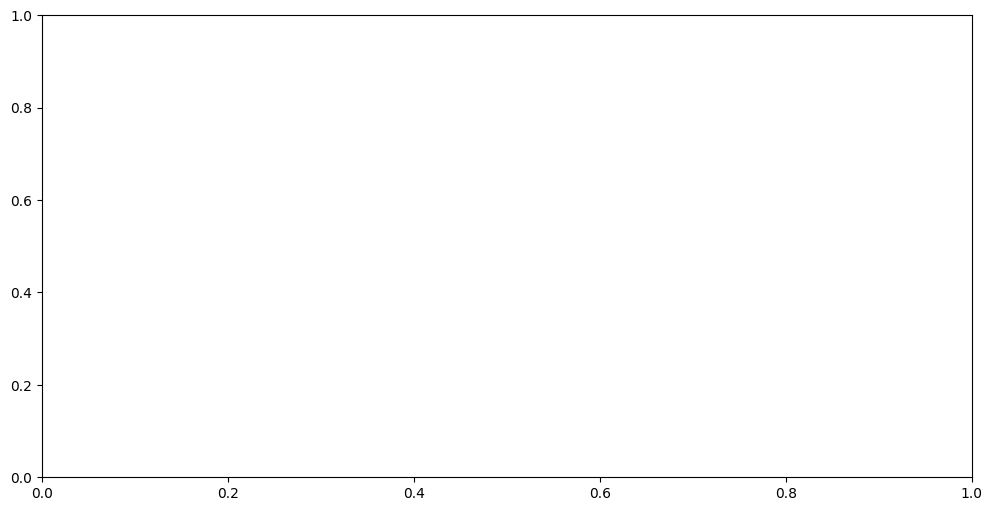

In [ ]:
#sentimiento_por_alcaldia.plot(kind='bar', figsize=(12, 6), annot = True)


#Acceptance Rates and Sentiment

In [ ]:
#Calcular el acceptance rate promedio por region y compararlo por el promedio de sentiment (grafico)

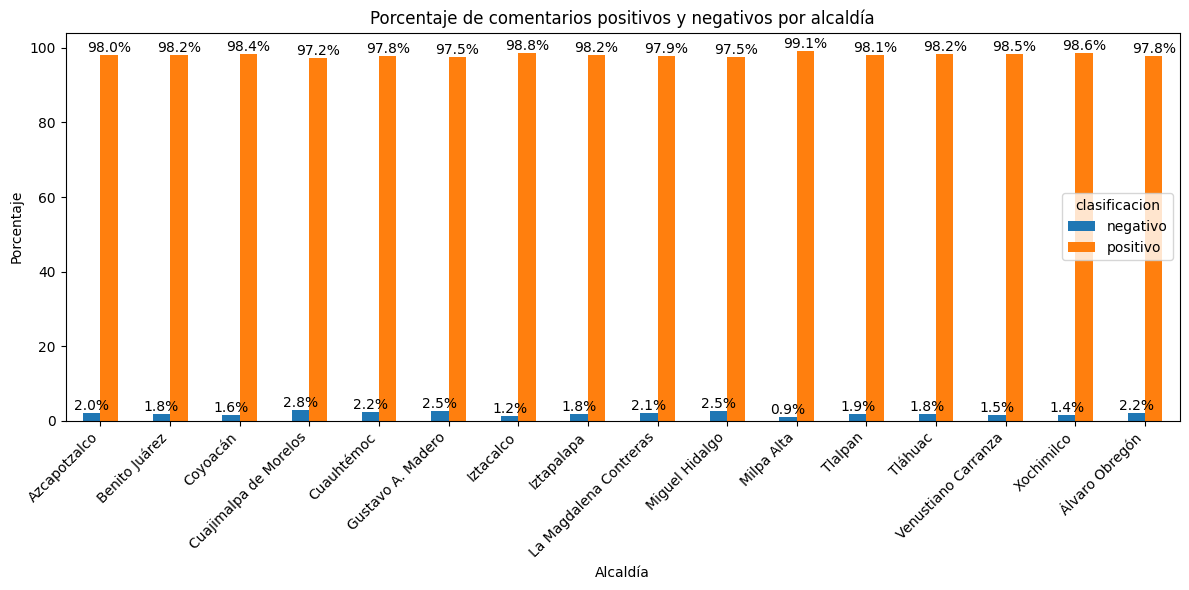

In [ ]:
ax = sentimiento_por_alcaldia.plot(kind='bar', figsize=(12, 6))

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Porcentaje de comentarios positivos y negativos por alcaldía')
plt.xlabel('Alcaldía')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('comentarios_porcen_alcaldias.png',  dpi=300, bbox_inches='tight')
plt.show()

# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error. I want to see the values on each bar.

## Calculate average acceptance rate

### Subtask:
Calculate the average `host_acceptance_rate` for each `neighbourhood_cleansed`.


**Reasoning**:
Inspect the data types of the `df_cr` DataFrame to understand the format of the `host_acceptance_rate` column and identify if conversion is needed for numerical calculations.



In [ ]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253876 entries, 0 to 253875
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0.2            253876 non-null  int64 
 1   Unnamed: 0.1            253876 non-null  int64 
 2   Unnamed: 0              253876 non-null  int64 
 3   id_x                    253876 non-null  int64 
 4   host_id                 253876 non-null  int64 
 5   host_acceptance_rate    253876 non-null  object
 6   neighbourhood_cleansed  253876 non-null  object
 7   price                   253876 non-null  object
 8   number_of_reviews       253876 non-null  int64 
 9   property_type           253876 non-null  object
 10  listing_id              253876 non-null  int64 
 11  id_y                    253876 non-null  int64 
 12  date                    253876 non-null  object
 13  reviewer_id             253876 non-null  int64 
 14  reviewer_name           253876 non-n

**Reasoning**:
The `host_acceptance_rate` column is of object type and contains '%'. It needs to be converted to a numerical format to calculate the average. I will remove the '%' sign, convert it to a float, and then calculate the mean acceptance rate grouped by `neighbourhood_cleansed`.



In [ ]:
df_cr['host_acceptance_rate'] = df_cr['host_acceptance_rate'].str.replace('%', '').astype(float) / 100
avg_acceptance_rate_by_neighborhood = df_cr.groupby('neighbourhood_cleansed')['host_acceptance_rate'].mean().reset_index()
display(avg_acceptance_rate_by_neighborhood)

,neighbourhood_cleansed,host_acceptance_rate
0,Azcapotzalco,0.970922
1,Benito Juárez,0.964803
2,Coyoacán,0.967851
3,Cuajimalpa de Morelos,0.978247
4,Cuauhtémoc,0.979977
5,Gustavo A. Madero,0.971170
6,Iztacalco,0.966847
7,Iztapalapa,0.966199
8,La Magdalena Contreras,0.973473
9,Miguel Hidalgo,0.979950


## Merge dataframes

### Subtask:
Merge the average acceptance rate DataFrame with the `sentimiento_por_alcaldia` DataFrame on the `neighbourhood_cleansed` column.


**Reasoning**:
Merging the average acceptance rate DataFrame with the sentiment by neighborhood DataFrame on the 'neighbourhood_cleansed' column to combine the sentiment analysis results with the host acceptance rates for each neighborhood.



In [ ]:
merged_df = pd.merge(sentimiento_por_alcaldia, avg_acceptance_rate_by_neighborhood, on='neighbourhood_cleansed', how='left')
display(merged_df)

,neighbourhood_cleansed,negativo,positivo,host_acceptance_rate
0,Azcapotzalco,2.012809,97.987191,0.970922
1,Benito Juárez,1.843768,98.156232,0.964803
2,Coyoacán,1.625907,98.374093,0.967851
3,Cuajimalpa de Morelos,2.814356,97.185644,0.978247
4,Cuauhtémoc,2.227401,97.772599,0.979977
5,Gustavo A. Madero,2.471763,97.528237,0.971170
6,Iztacalco,1.234043,98.765957,0.966847
7,Iztapalapa,1.781060,98.218940,0.966199
8,La Magdalena Contreras,2.092050,97.907950,0.973473
9,Miguel Hidalgo,2.478238,97.521762,0.979950


## Visualize comparison

### Subtask:
Create a visualization to compare the average acceptance rate and the sentiment percentages for each neighborhood.


**Reasoning**:
Create a grouped bar chart with sentiment percentages and acceptance rate on different y-axes.



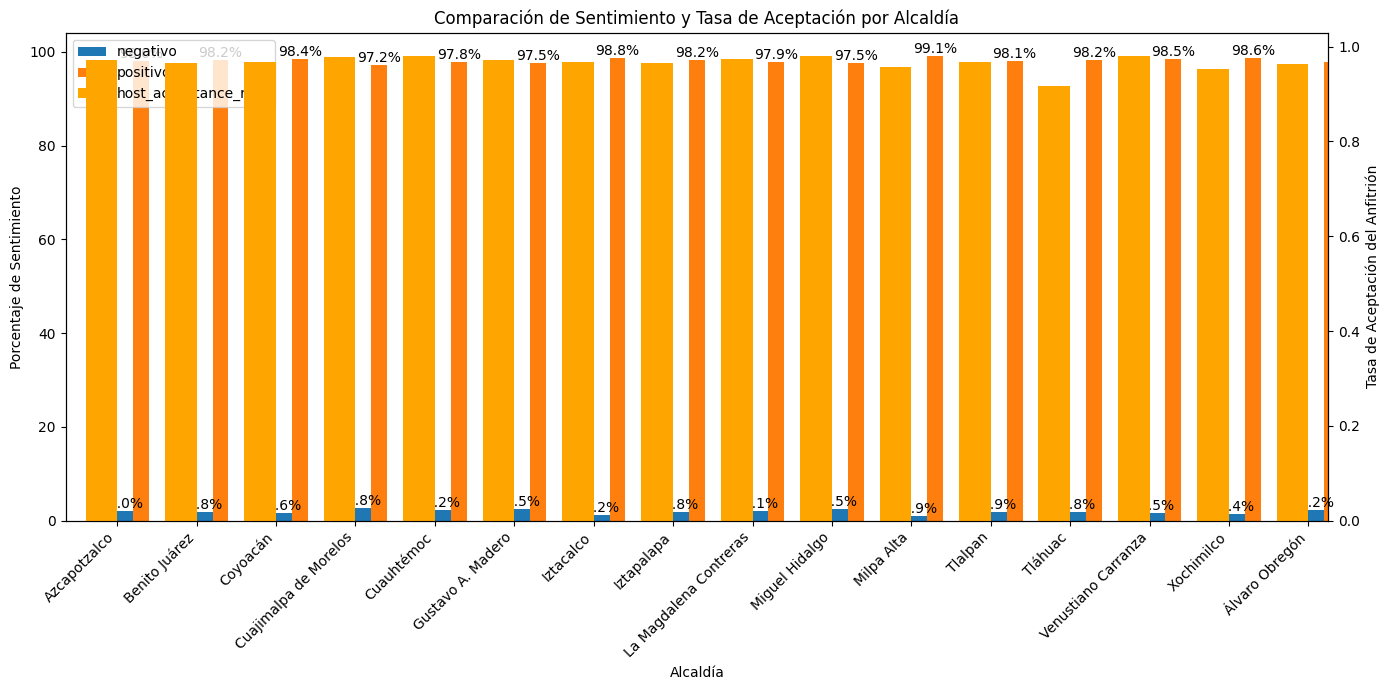

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot sentiment percentages on the primary y-axis
merged_df[['negativo', 'positivo']].plot(kind='bar', ax=ax1, position=0, width=0.4, legend=False)

ax2 = ax1.twinx()

# Plot acceptance rate on the secondary y-axis
merged_df['host_acceptance_rate'].plot(kind='bar', ax=ax2, position=1, width=0.4, color='orange', legend=False)

# Set labels and title
ax1.set_xlabel('Alcaldía')
ax1.set_ylabel('Porcentaje de Sentimiento')
ax2.set_ylabel('Tasa de Aceptación del Anfitrión')
plt.title('Comparación de Sentimiento y Tasa de Aceptación por Alcaldía')

# Add annotations for sentiment percentages
for i, container in enumerate(ax1.containers):
    ax1.bar_label(container, fmt='%.1f%%')

# Set x-axis tick labels and rotate
ax1.set_xticks(merged_df.index)
ax1.set_xticklabels(merged_df['neighbourhood_cleansed'], rotation=45, ha='right')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['negativo', 'positivo', 'host_acceptance_rate'], loc='upper left')


plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `host_acceptance_rate` column was successfully cleaned by removing the '%' symbol and converting it to a float, allowing for the calculation of the average acceptance rate per neighborhood.
*   The average host acceptance rate for each neighborhood was calculated and stored in the `avg_acceptance_rate_by_neighborhood` DataFrame.
*   The `sentimiento_por_alcaldia` DataFrame, containing sentiment percentages by neighborhood, was successfully merged with the `avg_acceptance_rate_by_neighborhood` DataFrame using a left merge on the `neighbourhood_cleansed` column.
*   A grouped bar chart was created to visualize the comparison between sentiment percentages (negative and positive) and the host acceptance rate for each neighborhood.
*   The bar chart utilized a dual y-axis to accommodate the different scales of the sentiment percentages and the host acceptance rate.
*   Annotations showing the percentage values were added to the sentiment bars for better readability.

### Insights or Next Steps

*   Analyze the generated visualization to identify any potential correlations or patterns between neighborhood sentiment and host acceptance rates.
*   Investigate neighborhoods with significantly high or low acceptance rates to understand the underlying factors contributing to these differences.
